# Group Assignment 1 - Zillow (San Fransisco)

In [22]:
# Import data and Plot

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import statsmodels.formula.api as smf

In [23]:
# Load the zillow dataset

zillow = pd.read_csv('zillow_rental.csv')

In [24]:
# Check the dataset

zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Columns: 102 entries, RegionID to 31/12/2022
dtypes: float64(94), int64(2), object(6)
memory usage: 2.0+ MB


In [25]:
# Show the first 5 rows of the dataset

zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,31/03/2015,30/04/2015,...,31/03/2022,30/04/2022,31/05/2022,30/06/2022,31/07/2022,31/08/2022,30/09/2022,31/10/2022,30/11/2022,31/12/2022
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2585.688900,2609.168132,...,3114.512403,3170.821868,3237.322640,3308.636280,3364.395121,3392.054826,3389.451192,3365.119483,3321.735835,3289.299455
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1946.783507,1957.261756,...,2766.873699,2792.164063,2825.976086,2846.883247,2870.314405,2884.333128,2898.687647,2889.836887,2881.269091,2871.924144
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1299.402569,1307.461791,...,1567.258051,1577.558101,1590.417247,1603.603153,1615.335907,1622.003502,1620.885870,1616.041589,1608.451657,1603.444974
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1512.626150,1528.316363,...,1847.535331,1871.471422,1900.270274,1921.383543,1939.979625,1945.315613,1944.132988,1939.464285,1932.195069,1933.372749
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1008.558187,1016.748530,...,1395.673891,1410.740817,1430.143729,1445.717822,1460.431930,1461.441079,1459.847602,1450.424529,1447.521690,1442.811014


In [26]:
# Choose San Fransisco and save it as new dataframe

zillow_sf = zillow[(zillow['RegionName'] == 'San Francisco') & (zillow['RegionType'] == 'city')]

In [27]:
# Show the dataset

zillow_sf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,31/03/2015,30/04/2015,...,31/03/2022,30/04/2022,31/05/2022,30/06/2022,31/07/2022,31/08/2022,30/09/2022,31/10/2022,30/11/2022,31/12/2022
14,20330,14,San Francisco,city,CA,CA,"San Francisco-Oakland-Berkeley, CA",San Francisco County,3232.520384,3259.535906,...,3389.52838,3415.974802,3449.790158,3472.819726,3486.739292,3496.962955,3512.665487,3512.711778,3497.429317,3464.805483


In [28]:
# Show the information of the new dataset

zillow_sf.describe()

,RegionID,SizeRank,31/03/2015,30/04/2015,31/05/2015,30/06/2015,31/07/2015,31/08/2015,30/09/2015,31/10/2015,...,31/03/2022,30/04/2022,31/05/2022,30/06/2022,31/07/2022,31/08/2022,30/09/2022,31/10/2022,30/11/2022,31/12/2022
count,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,20330.0,14.0,3232.520384,3259.535906,3293.979057,3313.272101,3352.240789,3382.662721,3388.658348,3409.652563,...,3389.52838,3415.974802,3449.790158,3472.819726,3486.739292,3496.962955,3512.665487,3512.711778,3497.429317,3464.805483
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20330.0,14.0,3232.520384,3259.535906,3293.979057,3313.272101,3352.240789,3382.662721,3388.658348,3409.652563,...,3389.52838,3415.974802,3449.790158,3472.819726,3486.739292,3496.962955,3512.665487,3512.711778,3497.429317,3464.805483
25%,20330.0,14.0,3232.520384,3259.535906,3293.979057,3313.272101,3352.240789,3382.662721,3388.658348,3409.652563,...,3389.52838,3415.974802,3449.790158,3472.819726,3486.739292,3496.962955,3512.665487,3512.711778,3497.429317,3464.805483
50%,20330.0,14.0,3232.520384,3259.535906,3293.979057,3313.272101,3352.240789,3382.662721,3388.658348,3409.652563,...,3389.52838,3415.974802,3449.790158,3472.819726,3486.739292,3496.962955,3512.665487,3512.711778,3497.429317,3464.805483
75%,20330.0,14.0,3232.520384,3259.535906,3293.979057,3313.272101,3352.240789,3382.662721,3388.658348,3409.652563,...,3389.52838,3415.974802,3449.790158,3472.819726,3486.739292,3496.962955,3512.665487,3512.711778,3497.429317,3464.805483
max,20330.0,14.0,3232.520384,3259.535906,3293.979057,3313.272101,3352.240789,3382.662721,3388.658348,3409.652563,...,3389.52838,3415.974802,3449.790158,3472.819726,3486.739292,3496.962955,3512.665487,3512.711778,3497.429317,3464.805483


In [31]:
# Check is there null value

zillow_sf.isnull().values.any()

## True means there is null or missing value in the dataset, we will drop missing values after transposing the data

True

In [30]:
# Transform the columns into rows

zillow_sf_trans = zillow_sf.transpose()

In [32]:
# Show the information of the new dataset

zillow_sf_trans.head(10)

,14
RegionID,20330
SizeRank,14
RegionName,San Francisco
RegionType,city
StateName,CA
State,CA
Metro,"San Francisco-Oakland-Berkeley, CA"
CountyName,San Francisco County
31/03/2015,3232.520384
30/04/2015,3259.535906


In [39]:
print(zillow_sf_trans.isnull().sum())

14    4
dtype: int64


In [40]:
#create new dataframe with missing values dropped since only 4
zillow_sf_dropped=zillow_sf_trans.dropna()

In [42]:
#check for missing values again
zillow_sf_dropped.isnull().values.any()

False

In [43]:
# Slice the dataframe only for date and price

zillow_sf_slice = zillow_sf_dropped.iloc[8:,:]

In [44]:
# Show the new dataframe just to check

zillow_sf_slice.head()

,14
31/03/2015,3232.520384
30/04/2015,3259.535906
31/05/2015,3293.979057
30/06/2015,3313.272101
31/07/2015,3352.240789


In [45]:
# Rename the columns

zillow_sf_slice.columns = ['Price']
df = pd.DataFrame(zillow_sf_slice, columns=['Price'])
df.head()

,Price
31/03/2015,3232.520384
30/04/2015,3259.535906
31/05/2015,3293.979057
30/06/2015,3313.272101
31/07/2015,3352.240789


In [46]:
# Set the price values as integer

df['Price'] = df['Price'].astype(int)

In [47]:
# Check the data types

df.dtypes
print(df)

            Price
31/03/2015   3232
30/04/2015   3259
31/05/2015   3293
30/06/2015   3313
31/07/2015   3352
...           ...
31/08/2022   3496
30/09/2022   3512
31/10/2022   3512
30/11/2022   3497
31/12/2022   3464

[90 rows x 1 columns]


Text(0, 0.5, 'Price')

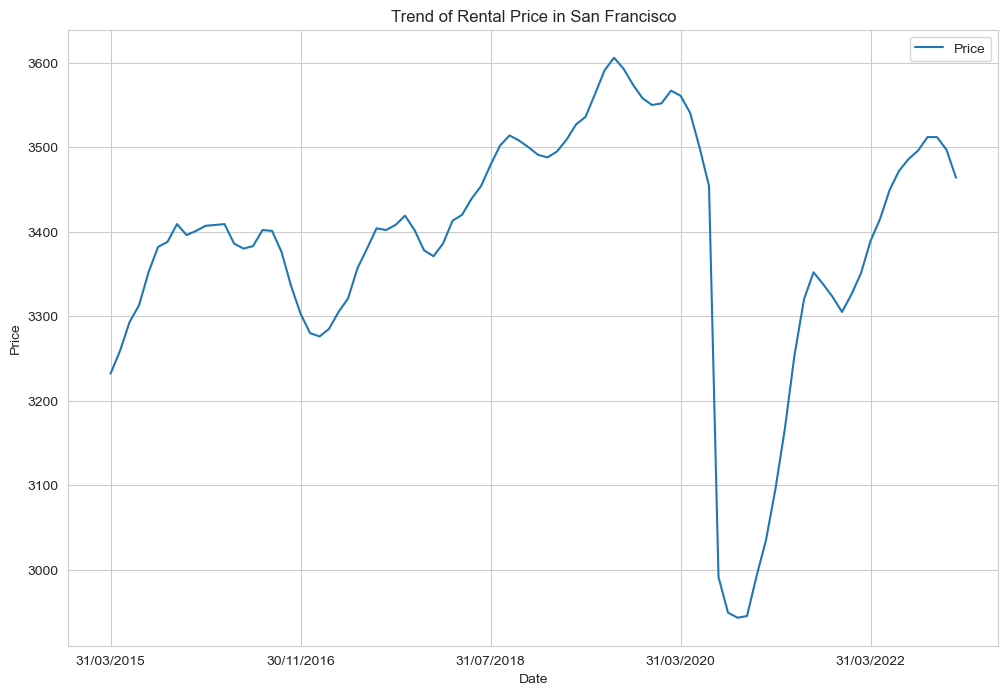

In [49]:
#Plot the trend of rental price

df.plot(figsize=(12,8))
plt.title("Trend of Rental Price in San Francisco")
plt.xlabel("Date")
plt.ylabel("Price")

In [50]:
#Calculate the average price for each year

df.index = pd.to_datetime(df.index)
grouped = df.groupby(df.index.year)
df_avg = grouped.mean().astype(int)
print(df_avg)

      Price
2015   3342
2016   3372
2017   3361
2018   3456
2019   3549
2020   3389
2021   3172
2022   3447


C:\Users\Sabreena Saeed\AppData\Local\Temp\ipykernel_12424\3000560312.py:3: UserWarning: Parsing '31/03/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df.index)
C:\Users\Sabreena Saeed\AppData\Local\Temp\ipykernel_12424\3000560312.py:3: UserWarning: Parsing '30/04/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df.index)
C:\Users\Sabreena Saeed\AppData\Local\Temp\ipykernel_12424\3000560312.py:3: UserWarning: Parsing '31/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df.index)
C:\Users\Sabreena Saeed\AppData\Local\Temp\ipykernel_12424\3000560312.py:3: UserWarning: Parsing '30/06/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df.index)
C:\Users\Sab

Text(0, 0.5, 'Price')

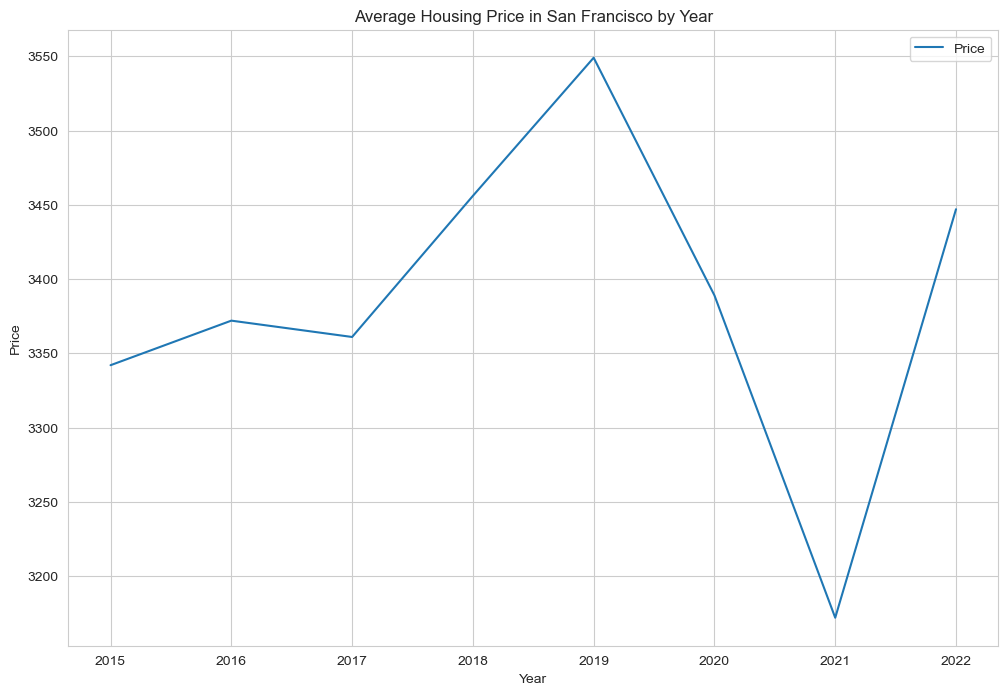

In [51]:
#Plot the average price for each year

df_avg.plot(figsize=(12,8))
plt.title("Average Housing Price in San Francisco by Year")
plt.xlabel("Year")
plt.ylabel("Price")

In [53]:
# Analyze the changes of average price per year, and add new column for %changes

df_avg['%_Change'] = (df_avg['Price'] / df_avg['Price'].shift(1) - 1) * 100
print(df_avg)

   index  Price  %_Change
0   2015   3342       NaN
1   2016   3372  0.897666
2   2017   3361 -0.326216
3   2018   3456  2.826540
4   2019   3549  2.690972
5   2020   3389 -4.508312
6   2021   3172 -6.403069
7   2022   3447  8.669609


Text(0, 0.5, 'Percentage Change')

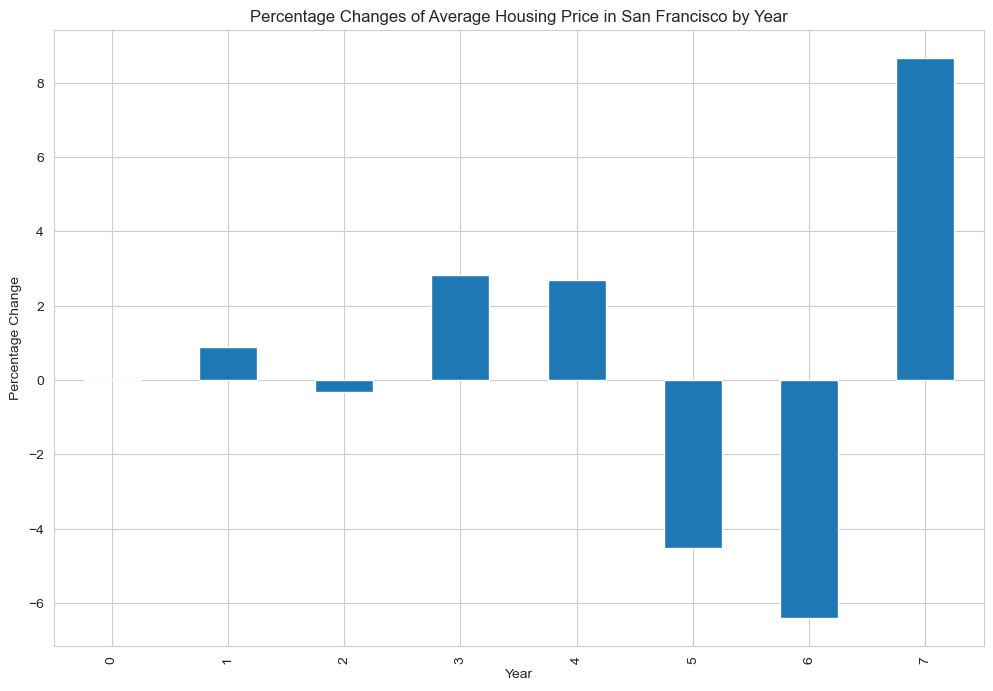

In [54]:
# Plot the changes of average price per year as bar graph

df_avg['%_Change'].plot(kind='bar', figsize=(12,8))
plt.title("Percentage Changes of Average Housing Price in San Francisco by Year")
plt.xlabel("Year")
plt.ylabel("Percentage Change")

In [55]:
# Rename the index to Year

df_avg.reset_index(inplace=True)
df_avg_copy = df_avg.rename(columns={'index': 'Year'})
print(df_avg_copy)

   level_0  Year  Price  %_Change
0        0  2015   3342       NaN
1        1  2016   3372  0.897666
2        2  2017   3361 -0.326216
3        3  2018   3456  2.826540
4        4  2019   3549  2.690972
5        5  2020   3389 -4.508312
6        6  2021   3172 -6.403069
7        7  2022   3447  8.669609


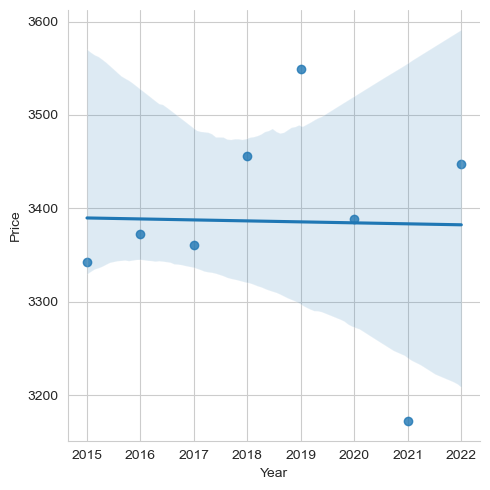

In [56]:
# Create a linear fit plot
sns.lmplot(x='Year',y='Price',data = df_avg_copy)

In [57]:
# Create a fitted model
lm = smf.ols(formula='Price ~ Year', data = df_avg_copy).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.166
Method:                 Least Squares   F-statistic:                  0.003304
Date:                Wed, 01 Feb 2023   Prob (F-statistic):              0.956
Time:                        14:35:31   Log-Likelihood:                -48.374
No. Observations:                   8   AIC:                             100.7
Df Residuals:                       6   BIC:                             100.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5500.6190   3.68e+04      0.150      0.8

C:\Users\Sabreena Saeed\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [58]:
# Make the prediction for average housing price in San Francisco for year 2023

pred_2023 = lm.predict({'Year': [2023]})
pred_2023 = pred_2023.item()
pred_2023y = "${:,.3f}".format(pred_2023)
print("The predicted average housing price in San Francisco for year 2023 is", pred_2023y)

The predicted average housing price in San Francisco for year 2023 is $3,381.286
